In [66]:
#load normalized and training test review sets
import json
with open ('norm_reviews.json') as f:
    norm_reviews=json.load(f)
    
norm_train_reviews, train_sentiment=norm_reviews['train']
norm_test_reviews, test_sentiment=norm_reviews['test']

In [67]:
#tokenize- create vocab to int mapping dictionary

from collections import Counter

all_text2= ' '.join(norm_train_reviews+norm_test_reviews)
#create a list of words
words=all_text2.split()

#count all the words using Counter Method
count_words=Counter(words)

total_words= len(words)
sorted_words= count_words.most_common(total_words)

In [68]:
vocab_to_int= {w:i for i, (w,c) in enumerate(sorted_words)}

In [69]:
#start indexing at 1, so that we can use 0 for padding
vocab_to_int= {w:i+1 for i, (w,c) in enumerate(sorted_words) if c>1} #remove words that only occur once- likely typos

In [70]:
print(vocab_to_int)

{'not': 1, 'movie': 2, 'film': 3, 'but': 4, 'one': 5, 'see': 6, 'make': 7, 'like': 8, 'good': 9, 'get': 10, 'well': 11, 'time': 12, 'would': 13, 'character': 14, 'go': 15, 'watch': 16, 'bad': 17, 'no': 18, 'story': 19, 'even': 20, 'think': 21, 'really': 22, 'show': 23, 'scene': 24, 'great': 25, 'look': 26, 'much': 27, 'say': 28, 'know': 29, 'could': 30, 'people': 31, 'also': 32, 'first': 33, 'give': 34, 'take': 35, 'way': 36, 'love': 37, 'play': 38, 'thing': 39, 'come': 40, 'find': 41, 'man': 42, 'end': 43, 'life': 44, 'seem': 45, 'work': 46, 'plot': 47, 'two': 48, 'actor': 49, 'want': 50, 'many': 51, 'year': 52, 'never': 53, 'try': 54, 'little': 55, 'may': 56, 'ever': 57, 'feel': 58, 'still': 59, 'part': 60, 'old': 61, 'something': 62, 'acting': 63, 'director': 64, 'use': 65, 'back': 66, 'lot': 67, 'real': 68, 'us': 69, 'guy': 70, 'funny': 71, 'performance': 72, 'woman': 73, 'though': 74, 'another': 75, 'big': 76, 'actually': 77, 'nothing': 78, 'role': 79, 'new': 80, 'leave': 81, 'sta

In [71]:
#encode the words
train_reviews_int=[]
for review in norm_train_reviews:
    r=[vocab_to_int[w] if w in vocab_to_int else 0 for w in review.split()]
    train_reviews_int.append(r)

test_reviews_int=[]
for review in norm_test_reviews:
    r=[vocab_to_int[w] if w in vocab_to_int else 0 for w in review.split()]
    test_reviews_int.append(r)

print(train_reviews_int[0:3])

[[6, 99, 17, 2, 107, 18, 47, 375, 8, 5, 17, 5527, 172, 1456, 1033, 50, 4508, 55, 91, 11, 146, 69, 28, 68, 3960, 36, 2, 447, 162, 101, 579, 20844, 71, 32, 6, 112, 1051, 1661, 165, 2035, 8302, 2250, 807, 12357, 18, 302, 1, 7, 27, 175, 45, 1620, 2403, 807, 78, 2976, 9, 26, 2, 447, 20, 63, 32, 9, 4, 19, 3402, 1], [1, 146, 148, 3, 6823, 455, 2820, 1536, 14, 100, 740, 2451, 102, 364, 57, 29, 3, 2820, 1536, 1, 295, 2734, 91, 357, 5912, 310, 1, 489, 15483, 300, 271, 970, 4, 463, 102, 364, 1, 263, 2791, 1663, 10, 419, 3202, 850, 1644, 364, 502, 988, 667, 402, 42, 498, 743, 171, 143, 879, 402, 5230, 2, 556, 3136, 533, 1149, 1869, 102, 690, 1095, 575, 8395, 1, 17, 4, 981, 16, 2, 2324, 6092, 237, 304, 364, 1, 128, 879, 4, 32, 163], [955, 6, 920, 32338, 2303, 207, 379, 2140, 55, 2, 323, 5, 68, 717, 324, 1813, 5, 1192, 265, 6, 52, 395, 142, 196, 4560, 128, 25, 265, 711, 550, 3433, 65, 183, 316, 244, 553, 119, 3627, 981, 22, 6266, 1082, 109, 7, 509, 422, 13, 1, 729, 5861, 9979, 2431, 688, 149, 26, 4,

In [72]:
#encode the labels
encoded_train_labels= [1 if label =='positive' else 0 for label in train_sentiment]
encoded_test_labels= [1 if label =='positive' else 0 for label in test_sentiment]

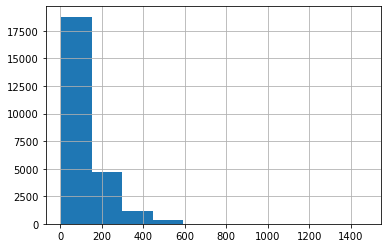

count    25000.000000
mean       124.172720
std         93.512286
min          5.000000
25%         66.000000
50%         92.000000
75%        151.000000
max       1471.000000
dtype: float64

In [73]:
#analyze reviews length
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

reviews_len= [len(x) for x in train_reviews_int]
pd.Series(reviews_len).hist()
plt.show()

pd.Series(reviews_len).describe()

In [74]:
#as you can see, min is 5 which means all reviews are greater than 0 length

In [75]:
#padding/truncating remaining data
import numpy as np
def pad_features(reviews_int, seq_length):

    '''
    return features of review_ints, where each review
    is padded with 0s or truncated to the input seq_length
    '''
    
    features = np.zeros((len(reviews_int), seq_length), dtype=int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length - review_len))
            new=zeroes + review
            
        elif review_len > seq_length:
            new = review[0:seq_length]
            
        features[i,:]= np.array(new)
        
    return features

In [76]:
seq_length=250 #200 #100
train_x= pad_features(train_reviews_int, seq_length)
train_y= np.array(encoded_train_labels)

remaining_x= pad_features(test_reviews_int, seq_length)
remaining_y= np.array(encoded_test_labels)

#split test data into 50% for validation and 50% for test
valid_x= remaining_x[0:int(len(remaining_x)*0.5)]
valid_y= remaining_y[0:int(len(remaining_y)*0.5)]

test_x=remaining_x[int(len(remaining_x)*0.5):]
test_y=remaining_y[int(len(remaining_y)*0.5):]

In [ ]:
#generate embeddings using pretrained glove vectors
import bcolz
import pickle

glove_path='glove.6B'

words = []
idx = 0
word2idx = {}
dim=300
vectors = bcolz.carray(np.zeros(1), rootdir=f'{glove_path}/6B.{dim}.dat', mode='w')

with open(f'{glove_path}/glove.6B.{dim}d.txt', 'rb') as f:
    for l in f:
        line = l.decode().split()
        word = line[0]
        words.append(word)
        word2idx[word] = idx
        idx += 1
        vect = np.array(line[1:]).astype(np.float)
        vectors.append(vect)
    
vectors = bcolz.carray(vectors[1:].reshape((400000, dim)), rootdir=f'{glove_path}/6B.{dim}.dat', mode='w')
vectors.flush()
pickle.dump(words, open(f'{glove_path}/6B.{dim}_words.pkl', 'wb'))
pickle.dump(word2idx, open(f'{glove_path}/6B.{dim}_idx.pkl', 'wb'))

In [77]:
#load pre generated embeddings
dim=100

import bcolz
import pickle

glove_path='glove.6B'
vectors = bcolz.open(f'{glove_path}/6B.{dim}.dat')[:]
words = pickle.load(open(f'{glove_path}/6B.{dim}_words.pkl', 'rb'))
word2idx = pickle.load(open(f'{glove_path}/6B.{dim}_idx.pkl', 'rb'))

glove = {w: vectors[word2idx[w]] for w in words}


In [78]:
glove['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [79]:
def create_embedding_matrix(word_index,embedding_dict,dimension):
    embedding_matrix=np.zeros((len(word_index)+1,dimension))

    for word,index in word_index.items():
        if word in embedding_dict:
            embedding_matrix[index]=embedding_dict[word]
        else:
            embedding_matrix[index] = np.random.normal(scale=0.6, size=(dimension, ))

    return embedding_matrix

embedding_matrix=create_embedding_matrix(word_index=vocab_to_int,
                                         embedding_dict=glove,
                                         dimension=dim)

In [80]:
#dataloaders and batching
import torch
from torch.utils.data import DataLoader, TensorDataset

#create Tensor datasets
train_data= TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data= TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data= TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

#dataloaders
batch_size=50

#Shuffling dataset again
train_loader= DataLoader(train_data, shuffle=True, batch_size= batch_size)
valid_loader= DataLoader(valid_data, shuffle=True, batch_size= batch_size)
test_loader= DataLoader(test_data, shuffle=True, batch_size= batch_size)

In [81]:
#obtain one batch of training data to check 

#obtain one batch of training data
dataiter= iter(train_loader)
sample_x, sample_y= dataiter.next()

print('Sample input size: ', sample_x.size()) #batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) #batch size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 250])
Sample input: 
 tensor([[    0,     0,     0,  ...,   276,    24,  2596],
        [ 1908,  1882,   323,  ...,   279,     6,    10],
        [    0,     0,     0,  ...,  1693, 20601,   657],
        ...,
        [    0,     0,     0,  ...,   224,    35,   259],
        [    0,     0,     0,  ..., 12398,  1081,   394],
        [    0,     0,     0,  ...,    60,    19,   537]], dtype=torch.int32)

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 1], dtype=torch.int32)


In [63]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, embedding_matrix, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight=nn.Parameter(torch.tensor(embedding_matrix,dtype=torch.float32))
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True, bidirectional=False)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size) 
        #self.fc = nn.Linear(hidden_dim, output_size*2) #bidirectional
        self.sig = nn.Sigmoid()
        
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)
        x=x.long()
        
        # Set initial states
        #h0 = torch.zeros(self.n_layers*2, x.size(0), self.hidden_dim)# 2 for bidirection 
        #c0 = torch.zeros(self.n_layers*2, x.size(0), self.hidden_dim)
        
        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        #lstm_out, hidden = self.lstm(embeds, (h0,c0))
        
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        

In [82]:
#training the network

# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim =dim #400
hidden_dim = 64 #128 #256
n_layers = 2

net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, embedding_matrix)

print(net)

SentimentLSTM(
  (embedding): Embedding(53184, 100)
  (lstm): LSTM(100, 64, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=64, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [83]:
train_on_gpu=False #don't have atm

# loss and optimization functions
lr=0.0005 #0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 3 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping
valid_loss_min = np.Inf

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    
    num_correct=0
    
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)
        
        #convert output probababilities to predicted class (0 or 1)
        pred= torch.round(output.squeeze()) #rounds to the nearest integer

        #compare predictions to true label
        correct_tensor= pred.eq(labels.float().view_as(pred))
        correct= np.squeeze(correct_tensor.numpy()) if not train_on_gpu\
            else np.squeeze(correct_tensor.cpu().numpy())
        num_correct += np.sum(correct)
        

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            val_num_correct=0
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())
                
                #convert output probababilities to predicted class (0 or 1)
                val_pred= torch.round(output.squeeze()) #rounds to the nearest integer

                #compare predictions to true label
                correct_tensor= val_pred.eq(labels.float().view_as(val_pred))
                correct= np.squeeze(correct_tensor.numpy()) if not train_on_gpu\
                    else np.squeeze(correct_tensor.cpu().numpy())
                val_num_correct += np.sum(correct)

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
#             if np.mean(val_losses) <= valid_loss_min:
#                 torch.save(net.state_dict(), './state_dict.pt')
#                 print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
#                 valid_loss_min = np.mean(val_losses)

    #get train accuracy
    train_acc = num_correct/len(train_loader.dataset)
    print("Train accuracy: {:.3f}%".format(train_acc*100))
    #get validation accuracy
    valid_acc = val_num_correct/len(valid_loader.dataset)
    print("Valid accuracy: {:.3f}%".format(valid_acc*100))
    

Epoch: 1/3... Step: 100... Loss: 0.721855... Val Loss: 0.610023
Epoch: 1/3... Step: 200... Loss: 0.481144... Val Loss: 0.535613
Epoch: 1/3... Step: 300... Loss: 0.318208... Val Loss: 0.487536
Epoch: 1/3... Step: 400... Loss: 0.359067... Val Loss: 0.434856
Epoch: 1/3... Step: 500... Loss: 0.585725... Val Loss: 0.411085
Train accuracy: 72.896%
Valid accuracy: 81.672%
Epoch: 2/3... Step: 600... Loss: 0.284441... Val Loss: 0.385814
Epoch: 2/3... Step: 700... Loss: 0.252931... Val Loss: 0.380469
Epoch: 2/3... Step: 800... Loss: 0.242754... Val Loss: 0.357914
Epoch: 2/3... Step: 900... Loss: 0.343244... Val Loss: 0.348440
Epoch: 2/3... Step: 1000... Loss: 0.231635... Val Loss: 0.341694
Train accuracy: 85.564%
Valid accuracy: 86.000%
Epoch: 3/3... Step: 1100... Loss: 0.285405... Val Loss: 0.334077
Epoch: 3/3... Step: 1200... Loss: 0.129327... Val Loss: 0.335017
Epoch: 3/3... Step: 1300... Loss: 0.292553... Val Loss: 0.331087
Epoch: 3/3... Step: 1400... Loss: 0.316399... Val Loss: 0.406905
Epo

In [85]:
#testing

#get test data loss and accuracy
test_losses=[] #track loss
num_correct=0
predictions=[]
actual=[]

#init hidden state
h= net.init_hidden(batch_size)

net.eval()
#iterate over test data
for inputs, labels in test_loader:
    
    # creating new variables for the hidden state, otherwise
    # we'd backprop through entire training history
    h= tuple([each.data for each in h])
    
    if(train_on_gpu):
        inputs, labels= inputs.cuda(), labels.cuda()
        
    #get predicted outputs
    inputs= inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    #calculate loss
    test_loss= criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    #convert output probababilities to predicted class (0 or 1)
    pred= torch.round(output.squeeze()) #rounds to the nearest integer
    
    #compare predictions to true label
    correct_tensor= pred.eq(labels.float().view_as(pred))
    correct= np.squeeze(correct_tensor.numpy()) if not train_on_gpu\
        else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)
    
    predictions+= [int(p.detach()) for p in pred]
    actual+=list(labels.numpy())
    
print("Test loss: {:.3f}".format(np.mean(test_losses)))
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}%".format(test_acc*100))

Test loss: 0.368
Test accuracy: 86.032%


In [86]:
decoded_predictions= ['positive' if label== 1 else 'negative' for label in predictions]
decoded_actual= ['positive' if label== 1 else 'negative' for label in actual]


In [87]:
import importlib
import model_evaluation_utils as meu
importlib.reload(meu)
meu.display_model_performance_metrics(true_labels=decoded_actual, predicted_labels=decoded_predictions, 
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8603
Precision: 0.8635
Recall: 0.8603
F1 Score: 0.86

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.83      0.91      0.87      6282
    negative       0.90      0.81      0.85      6218

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       5706      576
        negative       1170     5048
